<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/05_transfer_learning_in_tensorflow_part_2_fine_tunin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning with Tensorflow part 2 : Fine-tuning

In [ ]:
!nvidia-smi

Mon Sep  9 11:17:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Create heloer function


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-09 11:17:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-09-09 11:17:09 (16.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# import helper
from helper_functions import create_tensorboard_callback , plot_loss_curves , unzip_data,walk_through_dir

# Let's get some data

In [ ]:
# Get 10% of training data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2024-09-09 11:17:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  95.6MB/s    in 1.7s    

2024-09-09 11:17:22 (95.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Check out how many image and subdirection
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
# Create
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
import tf_keras as tfk


In [ ]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# Check out the class name
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# train_data_10_percent
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.99879471e+02 1.64879471e+02 1.22879463e+02]
   [1.97090073e+02 1.63351242e+02 1.18351242e+02]
   [1.96000000e+02 1.62317123e+02 1.17046875e+02]
   ...
   [1.42046387e+02 8.47879868e+01 5.17970505e+01]
   [1.40791626e+02 8.62693024e+01 5.05304642e+01]
   [1.42834854e+02 8.88348541e+01 5.28348579e+01]]

  [[2.02140625e+02 1.68707596e+02 1.25924103e+02]
   [1.98709824e+02 1.65709824e+02 1.20709816e+02]
   [1.96783478e+02 1.63997757e+02 1.18569199e+02]
   ...
   [1.42522827e+02 8.31870804e+01 4.97834816e+01]
   [1.40839462e+02 8.48394547e+01 4.98394547e+01]
   [1.43707626e+02 8.81406631e+01 5.29241409e+01]]

  [[2.01388397e+02 1.71000000e+02 1.27000000e+02]
   [1.98815201e+02 1.68732620e+02 1.22426811e+02]
   [1.96934479e+02 1.65785721e+02 1.19571426e+02]
   ...
   [1.43471603e+02 8.35059509e+01 4.89338493e+01]
   [1.43848221e+02 8.57656403e+01 5.14598351e+01]
   [1.44993515e+02 8.96051254e+01 5.42993240e+01]]

  ...

  [[1.79460449e+02 1.33531876e+02 6.31747284e+01]
   [1

##  Model 0 :Building a transfer learning model using the Keras Function API



In [ ]:
import tf_keras as tfk
# 1. Create base model with tf.keras.application
base_model =tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model
base_model.trainable=False

# 3. Create inputs into our model
inputs= tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# 4. If using a model like ResNet50V2 you will need to normalizr inputs (optinal) (you don't have to efficientNet )
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x=base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most impoetant informaetion , reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")


# 7. create the output activation layer
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)


# 8. Combine the inputs with the outputs into a model
model_0=tf.keras.Model(inputs,outputs)

# 9. compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 10. Fit the model and save
history_0=model_0.fit(train_data_10_percent,
                                 epochs=5,
                                #  steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                #  validation_steps=int(0.25 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
            )

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240909-111735
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.2846 - loss: 2.1154 - val_accuracy: 0.6916 - val_loss: 1.3690
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.7441 - loss: 1.2329 - val_accuracy: 0.7824 - val_loss: 0.9554
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.8036 - loss: 0.8873 - val_accuracy: 0.8052 - val_loss: 0.7853
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.8308 - loss: 0.7483 - val_accuracy: 0.8204 - val_loss: 0.6939
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.8659 - loss: 0.6254 - val_accuracy: 0.8232 - val_loss: 0.6391


In [ ]:
# Evaluate Test data
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8294 - loss: 0.6336


[0.6390967965126038, 0.823199987411499]

In [ ]:
# Check the later
for layer_number , layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_layer
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
# how about get summary
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, None, None, 3)  │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, None, None, 3)  │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, None, None, 32) │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, None, None, 32) │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, None, None, 32) │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# How about a summary of
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

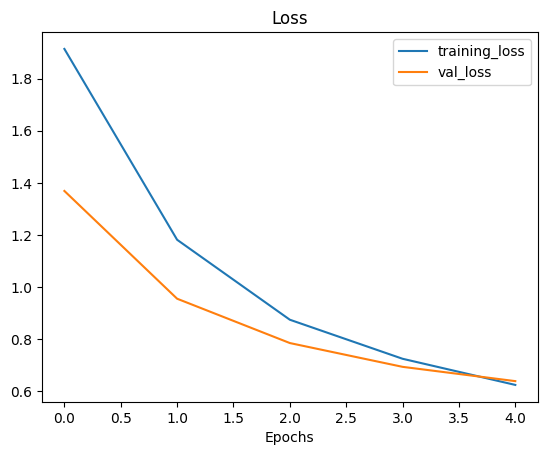

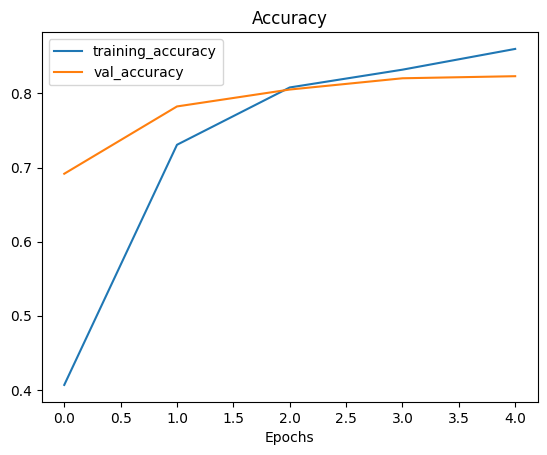

In [ ]:
# Check out our model's training curves
plot_loss_curves(history_0)

## Get a feature vector from a trained model

In [ ]:
# Define the input shape
input_shape=(1,4,4,3)
# Create a random tensor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(F"Random inout tensor : \n {input_tensor}\n")
# pass the random tensor throw a global
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor : \n {global_average_pooled_tensor}\n")

# check the shape
print(f"Shape of input tensor : {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor : {global_average_pooled_tensor.shape}")

Random inout tensor : 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor : 
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor : (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor : (1, 3)


In [ ]:
# let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a serires of transfer learning experiments



### Getting and preprocessing data for model_1

In [ ]:
# Download and unzip data
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

# Create
unzip_data("10_food_classes_1_percent.zip")

--2024-09-09 11:19:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   171MB/s    in 0.7s    

2024-09-09 11:19:56 (171 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# Create training and test dirs
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"


In [ ]:
# How many image we working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [ ]:
# Setup data loaders
IMG_SIZE=(224,224)
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode="categorical",
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=BATCH_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE,
                                                              batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,preprocessing

# Create data augmentation stage with horizontal flipping , ....
data_agumentation= keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Rescaling(1/255),
    layers.Resizing(224,224)
],name="data_augmentaion")


### Visualize our data augmentation layer

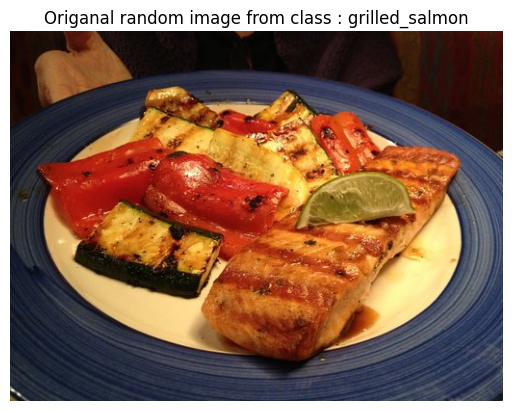

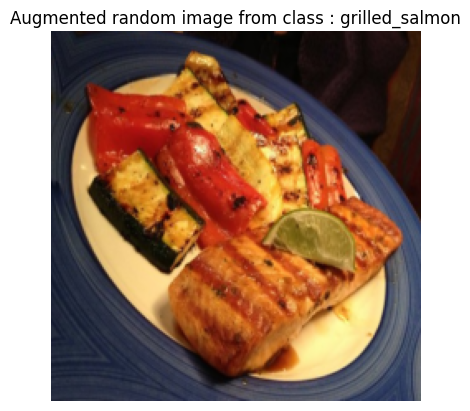

In [ ]:
# View a random image and compare it to it's augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class=random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image
# Read in random image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Origanal random image from class : {target_class}")
plt.axis(False);

# Now let's plot our augmented random image
augmented_img=data_agumentation(img)
plt.figure()
plt.imshow(augmented_img)
plt.title(f"Augmented random image from class : {target_class}")
plt.axis(False);

## Model 1 : Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,preprocessing

# Create data augmentation stage with horizontal flipping , ....
data_agumentation= keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Rescaling(1/255),
    layers.Resizing(224,224)
],name="data_augmentaion")


In [ ]:
# Setup input shape and base model , freezing the base model
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create input layer
inputs=layers.Input(shape=input_shape,name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_agumentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x,training=False)

# Pool output feature of the base model
x=layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# put a dense layer on as the output
outputs =layers.Dense(10,activation="softmax", name="output_layer")(x)

# Make a model using the input and output
model_1=keras.Model(inputs,outputs)

# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_1=model_1.fit(train_data_1_percent,
                      epochs=5,
                      validation_data=test_data,
                      callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240909-112001
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.0709 - loss: 2.3092 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.0566 - loss: 2.3017 - val_accuracy: 0.1000 - val_loss: 2.3031
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1157 - loss: 2.3021 - val_accuracy: 0.1000 - val_loss: 2.3042
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.0787 - loss: 2.3070 - val_accuracy: 0.1000 - val_loss: 2.3053
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.0709 - loss: 2.3085 - val_accuracy: 0.1000 - val_loss: 2.3057


In [ ]:
model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentaion (Sequential)        │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

In [ ]:
# Evaluate
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.1020 - loss: 2.3054


[2.3057186603546143, 0.10000000149011612]

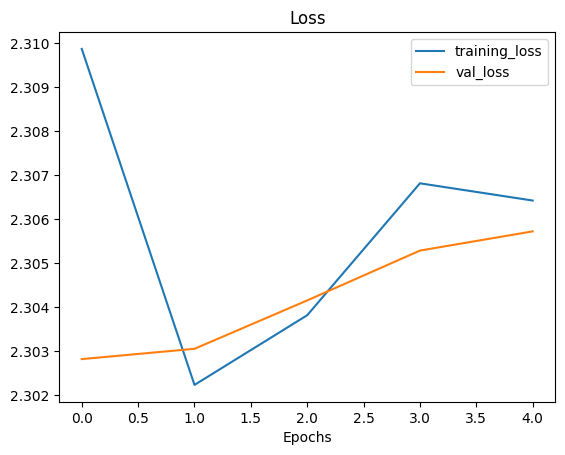

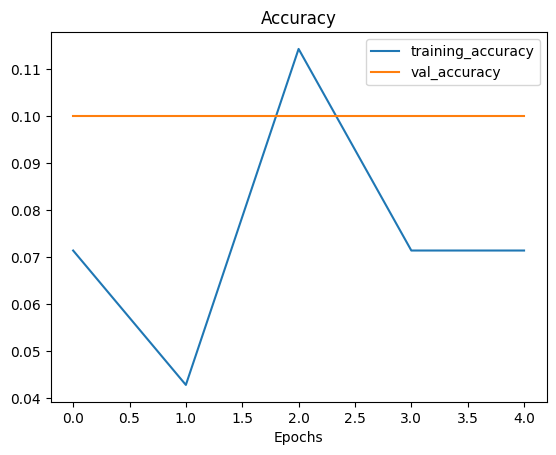

In [ ]:
# Loss Curve
plot_loss_curves(history_1)

## Model 2

In [ ]:
# Get 10% of data
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# unzip_data("10_food_classes_10_percent.zip")



train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"



In [ ]:
# How many images are in our directories?
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
# Set data inputs
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode="categorical",
                                                                          image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Create model_2 with data augmentataion built in
from tensorflow.keras import layers , preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentaion layer
data_augmentation=Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    # layers.Rescaling(1./255) # If you used a model like (ResNet)

],name="data_augmentation")

# Setup the input shape to our model
input_shape=(224,224,3)

# Create a frozen base model (called backbone)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False


# Create the inputs and outputs (including the layers in between)
inputs=layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs) # augment our training images (augmentation doesn't occur on test data)
x=base_model(x,training=False) # pass the augmented images to base model but keep it in inference mode
x=layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)
model_2=tf.keras.Model(inputs,outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_2D            │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### Creating a ModelCheckpoint callback

In [ ]:
# set checkpoint path
checkpoint_path="ten_percent_model_checkpoints_weights/checkpoint.weights.h5"
# Create a modelCheckPoint callback that saves the model's Weights only
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq="epoch",# save every epoch
                                                       verbose=1
                                                       )


### Fit model 2 passing in the ModelCheckpoint calback


In [ ]:
initial_epochs=5


In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs=5
history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                        epochs=initial_epochs,
                                        validation_data=test_data,
                                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_data_aug"),
                                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240909-112132
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.1989 - loss: 2.2588
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 469ms/step - accuracy: 0.2025 - loss: 2.2520 - val_accuracy: 0.5404 - val_loss: 1.5968
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5549 - loss: 1.5973
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 402ms/step - accuracy: 0.5570 - loss: 1.5932 - val_accuracy: 0.7260 - val_loss: 1.1472
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6499 - loss: 1.2603
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 587ms/step - accuracy: 0.6508 - loss: 1.2578 - val_accuracy: 0.7596 - val_loss: 0.9491
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/ste

In [ ]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8208 - loss: 0.6493


[0.6390967965126038, 0.823199987411499]

In [ ]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7971 - loss: 0.7632


[0.7565894722938538, 0.798799991607666]

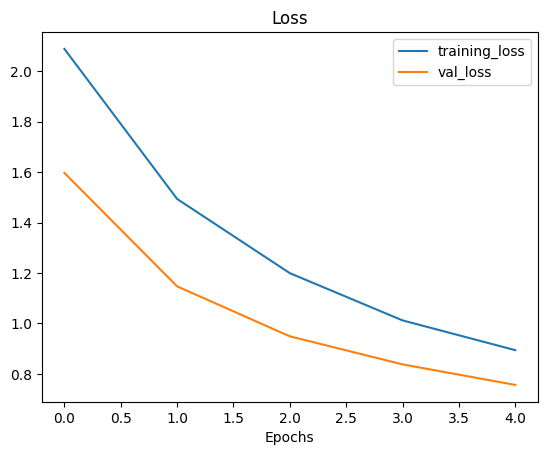

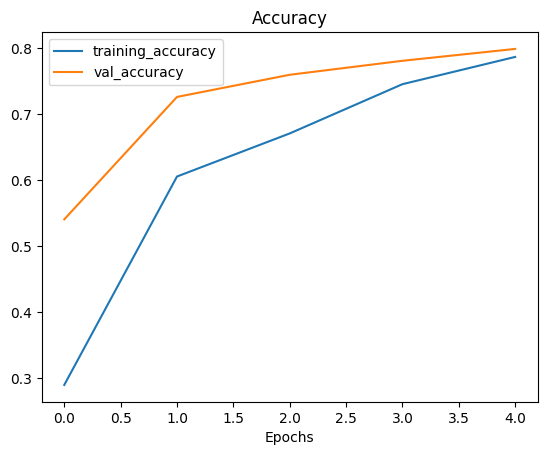

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

### Loading in checkpointed weights

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluate model_2 with loaded weights
loaded_weights_model_results=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7980 - loss: 0.7553


In [ ]:
# It the result from our previously evaluated model_2 match the loaded weight, everything has work!

# original model_2
# 79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.7853 - loss: 0.7595
# [0.7594529390335083, 0.7907999753952026]

## Model 3 : fine tuning an existing model on 10% of the data

In [ ]:
# Layers in loaded_model
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_2D, built=True>,
 <Dense name=output_layer, built=True>]

In [ ]:
# Are these layers trainable?
for layer in model_2.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augmentation, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling_2D, built=True> True
<Dense name=output_layer, built=True> True


In [ ]:
# What layers are in our base_model
for i, layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name , layer.trainable)

0 input_layer_4 False
1 rescaling_6 False
2 normalization_2 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
# How many trainable varialbes are in our base model ?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# To begin fine-tuning , let's start bey setting the last 10 layers of our base_model.trainable=True
base_model.trainable=True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]: # For every layer exept the last 10 layer
  layer.trainable=False



In [ ]:
#Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),# when fine-tuning you typicallly want to lower the learning rate by 10x*
                metrics=["accuracy"])


In [ ]:
# Check which layers are tunable (trainable)
for layer_number , layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name , layer.trainable)

0 input_layer_4 False
1 rescaling_6 False
2 normalization_2 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
# Now we've unfrozen some of the layers closer to the top, how mant trainabel varibale are there?
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs=initial_epochs + 5
# Refit the model (same as model_2 except woth more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # Start training from previous last epoch
                                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                      experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240909-112315
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 666ms/step - accuracy: 0.7325 - loss: 1.0022 - val_accuracy: 0.8064 - val_loss: 0.7010
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 589ms/step - accuracy: 0.8194 - loss: 0.7758 - val_accuracy: 0.8184 - val_loss: 0.6159
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 590ms/step - accuracy: 0.8270 - loss: 0.6903 - val_accuracy: 0.8372 - val_loss: 0.5539
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 571ms/step - accuracy: 0.8316 - loss: 0.6563 - val_accuracy: 0.8404 - val_loss: 0.5185
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - accuracy: 0.8498 - loss: 0.5752 - val_accuracy: 0.8508 - val_loss: 0.4892
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 364ms/step - accuracy: 0.8825 - loss: 0.5657 - val_accuracy: 0.8548 - val_loss: 0.4626


In [ ]:
# Evaluate the fine-tuned model (model_3 which is actualy model_2 fine-tuned for another 5 epochs)
result_fine_tune_10_percent=model_2.evaluate(test_data)


79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8606 - loss: 0.4530


In [ ]:
result_fine_tune_10_percent

[0.4625612199306488, 0.8547999858856201]

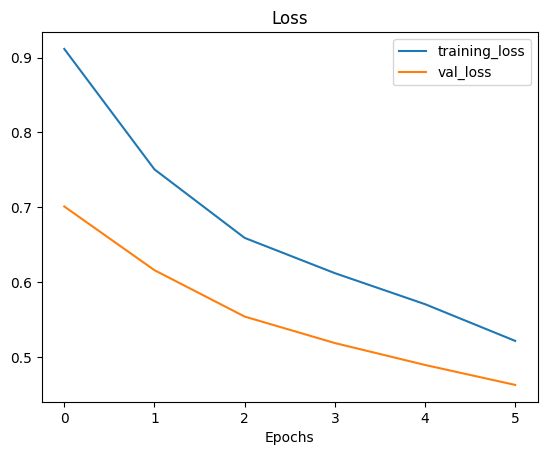

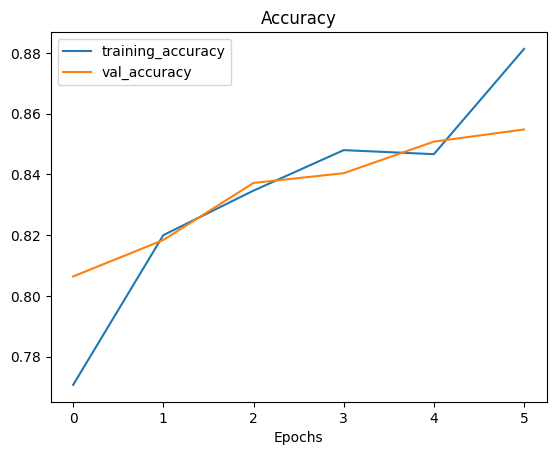

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
# Let's create a function to compare training histories
def compare_history(original_history,new_history,initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # combine original history
  total_acc=acc+new_history.history["accuracy"]
  total_loss=loss+new_history.history["loss"]

  total_val_acc=val_acc+new_history.history["val_accuracy"]
  total_val_loss=val_loss+new_history.history["val_loss"]

  # Make plots for accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Val Accuracy")
  plt.plot([initial_epochs-1 , initial_epochs-1],plt.ylim(),label="Start Fine Tunining")
  plt.legend(loc="lower right")
  plt.title("Training and validation Accuracy")

  # Make plots for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training loss")
  plt.plot(total_val_loss ,label="Val loss")
  plt.plot([initial_epochs-1 , initial_epochs-1],plt.ylim(),label="Start Fine Tunining")
  plt.legend(loc="upper right")
  plt.title("Training and validation Loss")

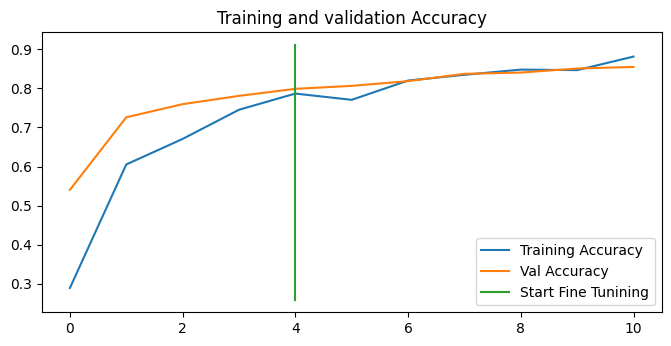

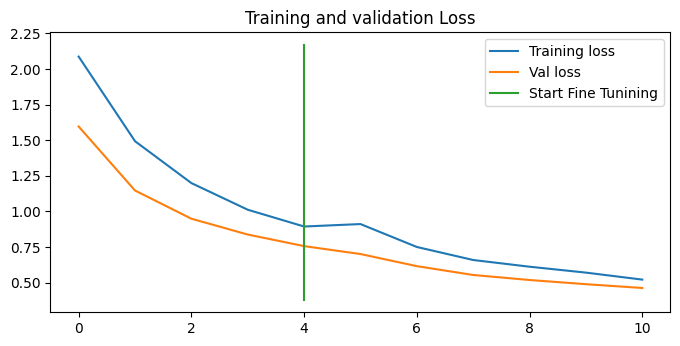

In [ ]:
compare_history(history_10_percent_data_aug,
                history_fine_10_percent_data_aug,
                initial_epochs=5)

## Model 4 : Fine-tuning and existing model on all of the data 100%

In [ ]:
# Download and unzip 10 classes of food101 data with all image
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2024-09-09 11:25:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   253MB/s    in 2.0s    

2024-09-09 11:25:17 (253 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir_all_data="10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"

In [ ]:
# How many images are we working with now ?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,label_mode="categorical",image_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",
                                                              image_size=IMG_SIZE,
                                                              batch_size=BATCH_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Evaluate model 2
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8612 - loss: 0.4457


[0.4625612199306488, 0.8547999858856201]

In [ ]:
result_fine_tune_10_percent

[0.4625612199306488, 0.8547999858856201]

In [ ]:
# Load a model from checkpoint , that way we can fine-tune from
# the same stege the 10 percent data model was fine-tuned from

model_2.load_weights(checkpoint_path)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Let's evaluate model_2 now
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.7557 - loss: 0.8150


[0.8306853771209717, 0.7603999972343445]

In [ ]:
# Check which layers are tunable in the wholw model
for layer_number ,layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [ ]:
# Let;s drill into our base_model (efficientnetb0) and see what layers are trainable
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_layer_4 False
1 rescaling_6 False
2 normalization_2 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
# Continue to train and fine-tune the model to our data (100% of training data)
fine_tune_epochs=initial_epochs+5

history_fint_10_classes_full=model_2.fit(train_data_10_classes_full,epochs=fine_tune_epochs,
                                         validation_data=test_data,
                                         initial_epoch=history_10_percent_data_aug.epoch[-1],
                                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20240909-113047
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 174ms/step - accuracy: 0.7353 - loss: 0.9075 - val_accuracy: 0.8812 - val_loss: 0.3816
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 167ms/step - accuracy: 0.8038 - loss: 0.6089 - val_accuracy: 0.8860 - val_loss: 0.3350
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 165ms/step - accuracy: 0.8323 - loss: 0.5384 - val_accuracy: 0.9000 - val_loss: 0.3043
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 184ms/step - accuracy: 0.8501 - loss: 0.4872 - val_accuracy: 0.9064 - val_loss: 0.2844
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 158ms/step - accuracy: 0.8550 - loss: 0.4528 - val_accuracy: 0.9072 - val_loss: 0.2804
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 160ms/step - accuracy: 0.8606 - loss: 0.4352 - val_accuracy: 0.9060 - val_loss: 0.2723


In [ ]:
result_fine_tune_full_data=model_2.evaluate(test_data)
result_fine_tune_full_data

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9057 - loss: 0.2627


[0.2722625434398651, 0.906000018119812]

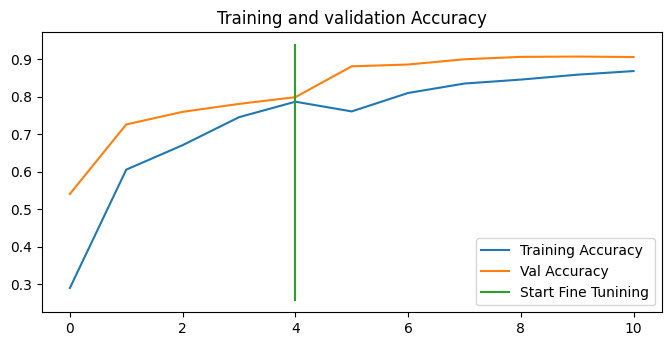

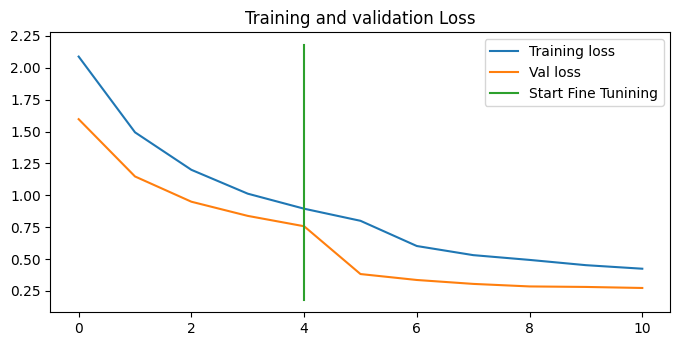

In [ ]:
# How did fine-tuning go with more data ?
compare_history(original_history=history_10_percent_data_aug,new_history=history_fint_10_classes_full,initial_epochs=5)

## Viewing our experement data on TensorBoard